In [2]:
import pandas as pd

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\HP\veri madenciliği\TMDB_tv_dataset_v3.csv')
print("Veri başarıyla yüklendi!")

Veri başarıyla yüklendi!


In [6]:
print("--- Veri Setinin İlk 5 Satırı ---")
print(df.head()) 

--- Veri Setinin İlk 5 Satırı ---
      id              name  number_of_seasons  number_of_episodes  \
0   1399   Game of Thrones                  8                  73   
1  71446       Money Heist                  3                  41   
2  66732   Stranger Things                  4                  34   
3   1402  The Walking Dead                 11                 177   
4  63174           Lucifer                  6                  93   

  original_language  vote_count  vote_average  \
0                en       21857         8.442   
1                es       17836         8.257   
2                en       16161         8.624   
3                en       15432         8.121   
4                en       13870         8.486   

                                            overview  adult  \
0  Seven noble families fight for control of the ...  False   
1  To carry out the biggest heist in history, a m...  False   
2  When a young boy vanishes, a small town uncove...  False   
3  S

In [7]:
print("\n--- Veri Tipleri ve Eksik Değer Özeti ---")
df.info()



--- Veri Tipleri ve Eksik Değer Özeti ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_

In [8]:
print("\n--- Sayısal Sütunların Temel İstatistikleri ---")
print(df.describe())



--- Sayısal Sütunların Temel İstatistikleri ---
                  id  number_of_seasons  number_of_episodes     vote_count  \
count  168639.000000      168639.000000       168639.000000  168639.000000   
mean   111307.074704           1.548497           24.465082      13.305054   
std     76451.662352           2.942872          134.799622     190.809059   
min         1.000000           0.000000            0.000000       0.000000   
25%     45936.500000           1.000000            1.000000       0.000000   
50%     97734.000000           1.000000            6.000000       0.000000   
75%    196923.500000           1.000000           20.000000       1.000000   
max    251213.000000         240.000000        20839.000000   21857.000000   

        vote_average     popularity  episode_run_time  
count  168639.000000  168639.000000     168639.000000  
mean        2.333843       5.882644         22.603348  
std         3.454334      42.023216         47.950427  
min         0.000000    

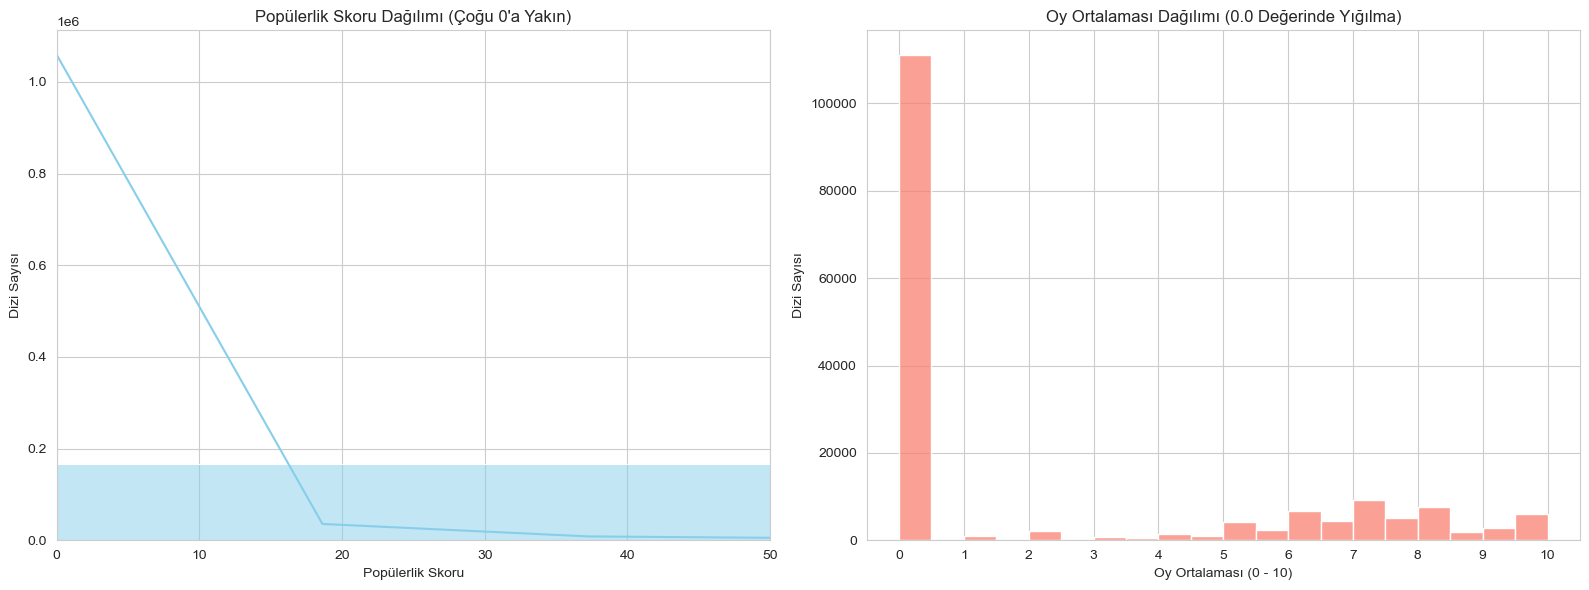

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Görselleştirme ayarları
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- A. Popülerlik Dağılımı ---
# Aykırı değerleri görmezden gelip yığılmayı incelemek için x ekseni sınırlandırılır.
sns.histplot(df['popularity'], bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Popülerlik Skoru Dağılımı (Çoğu 0\'a Yakın)')
axes[0].set_xlabel('Popülerlik Skoru')
axes[0].set_ylabel('Dizi Sayısı')
axes[0].set_xlim(0, 50) # İlk 50 popülerlik skorundaki yoğunlaşmayı gösterir.

# --- B. Oy Ortalaması Dağılımı ---
# 0.0'daki yığılmayı net görmek için
sns.histplot(df['vote_average'], bins=20, kde=False, color='salmon', ax=axes[1])
axes[1].set_title('Oy Ortalaması Dağılımı (0.0 Değerinde Yığılma)')
axes[1].set_xlabel('Oy Ortalaması (0 - 10)')
axes[1].set_ylabel('Dizi Sayısı')
axes[1].set_xticks(range(0, 11))

plt.tight_layout()
plt.show()


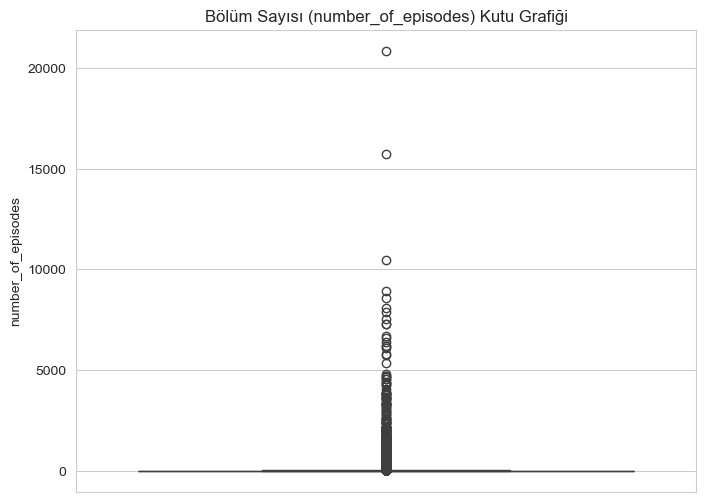

In [10]:
# number_of_episodes sütununda aykırı değerleri görmek için
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['number_of_episodes'])
plt.title('Bölüm Sayısı (number_of_episodes) Kutu Grafiği')
plt.show()


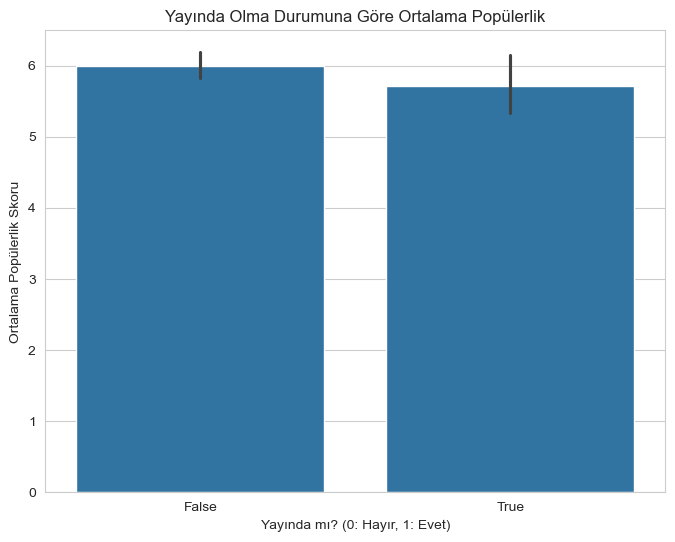

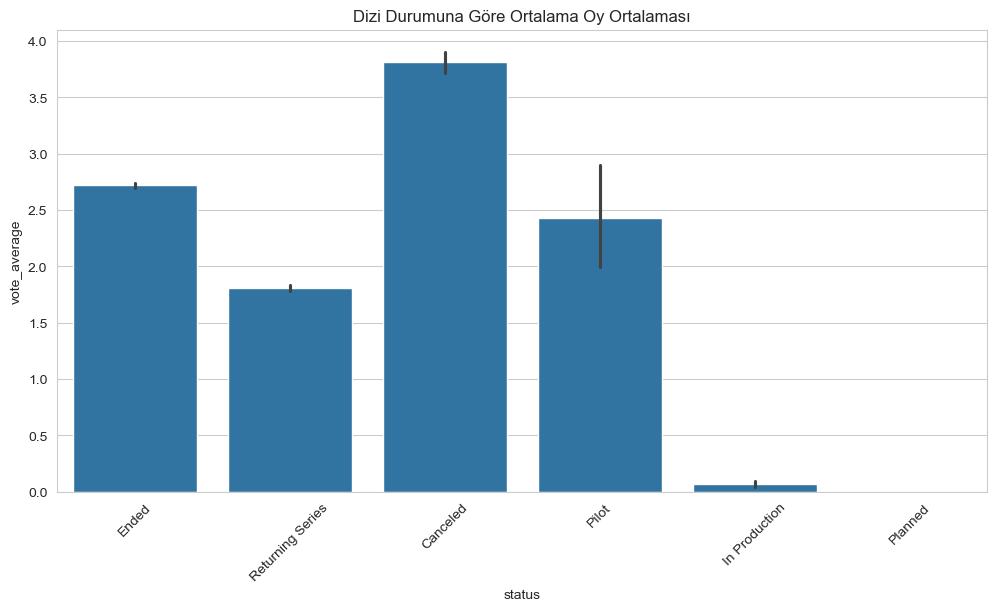

In [11]:
# in_production (Yayında olup olmama) durumuna göre ortalama popülerlik
plt.figure(figsize=(8, 6))
sns.barplot(x='in_production', y='popularity', data=df)
plt.title('Yayında Olma Durumuna Göre Ortalama Popülerlik')
plt.xlabel('Yayında mı? (0: Hayır, 1: Evet)')
plt.ylabel('Ortalama Popülerlik Skoru')
plt.show()

# Durum (Status) sütununa göre ortalama oy ortalaması
plt.figure(figsize=(12, 6))
sns.barplot(x='status', y='vote_average', data=df)
plt.title('Dizi Durumuna Göre Ortalama Oy Ortalaması')
plt.xticks(rotation=45)
plt.show()


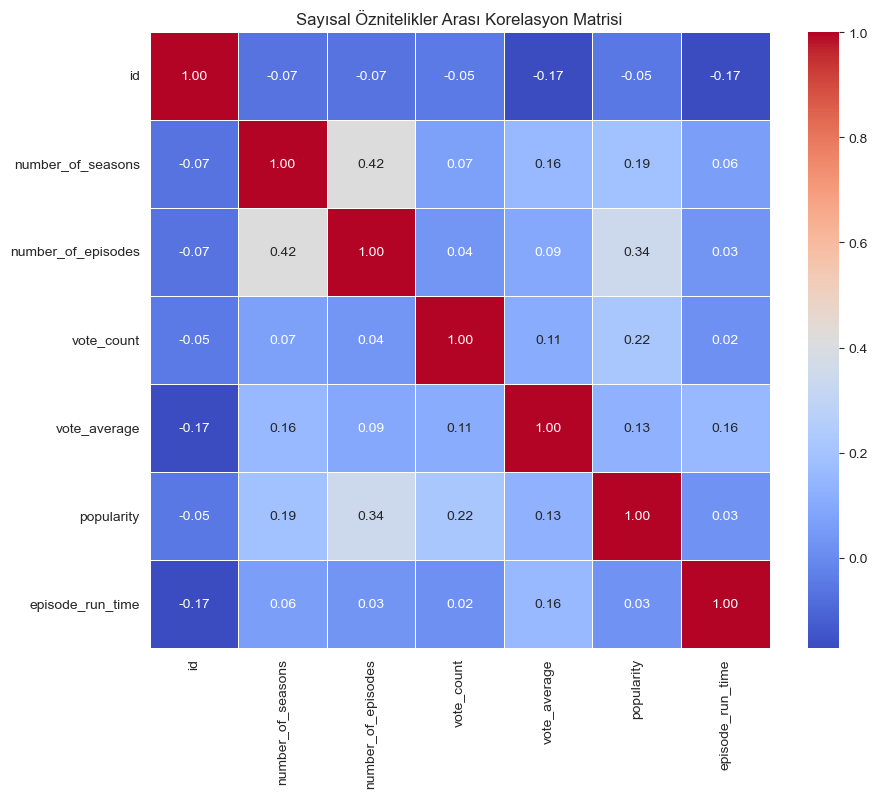

In [12]:
import seaborn as sns
# Sadece sayısal sütunları seçin
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Korelasyon matrisini hesaplayın
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
# 'annot=True' ile korelasyon değerlerini grafikte gösteririz.
# 'coolwarm' renk haritası, pozitif (sıcak) ve negatif (soğuk) ilişkileri vurgular.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Sayısal Öznitelikler Arası Korelasyon Matrisi')
plt.show()



In [13]:
# Çıkarılacak sütun listesi
columns_to_drop = [
    'id', 'name', 'original_name', 'backdrop_path', 
    'poster_path', 'homepage', 'tagline'
]

# Sütunları DataFrame'den çıkarma
df_temp = df.drop(columns=columns_to_drop, axis=1)

print(f"Sütun çıkarıldıktan sonra kalan sütun sayısı: {df_temp.shape[1]}")

Sütun çıkarıldıktan sonra kalan sütun sayısı: 22


In [14]:
# Hedef Değişken (y)
y = df_temp['popularity']

# Öznitelikler (X)
X = df_temp.drop('popularity', axis=1)

print("\nKalan Özniteliklerdeki Eksik Değer Kontrolü:")
print(X.isnull().sum().sort_values(ascending=False).head(10))


Kalan Özniteliklerdeki Eksik Değer Kontrolü:
created_by              132143
production_companies    109297
production_countries     91128
overview                 75306
networks                 71050
genres                   68926
spoken_languages         59359
languages                58589
first_air_date           31736
origin_country           31030
dtype: int64


In [15]:
# Kategorik (object) ve Boolean sütunları seçme
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Eksik değerleri 'Unknown' ile doldurma (Imputation)
X[categorical_cols] = X[categorical_cols].fillna('Unknown')

In [16]:
# 1. Eksik Tarihleri Doldurma (Çok Eski Bir Tarihle)
X['first_air_date'] = X['first_air_date'].fillna('1900-01-01')
X['last_air_date'] = X['last_air_date'].fillna('1900-01-01')

# 2. Tarih Tipine Dönüştürme
X['first_air_date'] = pd.to_datetime(X['first_air_date'], errors='coerce')
X['last_air_date'] = pd.to_datetime(X['last_air_date'], errors='coerce')

# 3. Yeni Öznitelik Mühendisliği

# Dizinin yaşı (Aktiflik Süresi) - (Yıllık olarak)
X['series_age'] = (pd.to_datetime('today') - X['first_air_date']).dt.days / 365.25

# Dizinin yayın süresi (ilk ve son tarih arasındaki fark)
X['active_duration_days'] = (X['last_air_date'] - X['first_air_date']).dt.days

# İlk ve son tarih sütunlarını çıkarıyoruz
X = X.drop(columns=['first_air_date', 'last_air_date'])

In [17]:
# Son eksik değer kontrolü (Sayısal sütunlar kalmış olsaydı)
# X['numerik_sutun'].fillna(X['numerik_sutun'].median(), inplace=True)

# Son durumda eksik değeri olan sütun kalmadığını varsayıyoruz.
print("\nFinal Eksik Değer Kontrolü (True: Eksik Değer Var):")
print(X.isnull().any().any())


Final Eksik Değer Kontrolü (True: Eksik Değer Var):
True


In [18]:
# Sadece sayısal (int ve float) tiplerdeki sütunları seçme
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print("Doldurma Öncesi Eksik Sayısal Değerler:")
print(X[numerical_cols].isnull().sum().sort_values(ascending=False).head())

# Sayısal sütunlardaki eksik değerleri MEDYAN ile doldurma
for col in numerical_cols:
    # Sadece eksik değeri olan sütunlar için doldurma yaparız
    if X[col].isnull().any():
        median_value = X[col].median()
        X[col].fillna(median_value, inplace=True)

print("\nMedyan ile doldurma tamamlandı.")

# Son kontrol
print("\nFinal Eksik Değer Kontrolü (True olmamalıdır):")
print(X.isnull().any().any())

Doldurma Öncesi Eksik Sayısal Değerler:
active_duration_days    32830
series_age              31736
number_of_seasons           0
vote_count                  0
number_of_episodes          0
dtype: int64

Medyan ile doldurma tamamlandı.

Final Eksik Değer Kontrolü (True olmamalıdır):


C:\Users\HP\AppData\Local\Temp\ipykernel_2304\3168858244.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_value, inplace=True)


False


In [21]:
# 1. ADIM: X'i en baştan temiz haliyle tekrar oluştur (Reset atıyoruz)
# df_temp hafızada durduğu için onu kullanabiliriz.
X = df_temp.drop('popularity', axis=1)

# 2. ADIM: Sayısal eksikleri tekrar hızlıca doldur (Resetlediğimiz için gitti)
num_cols = X.select_dtypes(include=['number']).columns
for col in num_cols:
    X[col] = X[col].fillna(X[col].median())

# 3. ADIM: Şimdi DÜZELTİLMİŞ ayırma kodunu uyguluyoruz
def extract_first_item(text_str):
    # Boşsa veya Unknown ise geç
    if pd.isna(text_str) or text_str == 'Unknown':
        return 'Unknown'
    # Virgülle ayır, ilkini al (Örn: "Drama, Crime" -> "Drama")
    return str(text_str).split(',')[0].strip()

cols_to_process = ['genres', 'languages', 'networks', 'origin_country', 'production_countries']

for col in cols_to_process:
    if col in X.columns:
        # Yeni sütunu oluştur (main_genres vs.)
        X[f'main_{col}'] = X[col].apply(extract_first_item)
        # Eskisini sil
        X = X.drop(columns=[col])

# 4. SONUÇ
print("\nVeriler Başarıyla Ayrıştırıldı!")
print("Yeni Sütunların İlk 5 Satırı:")
new_cols = [f'main_{c}' for c in cols_to_process]
print(X[new_cols].head())


Veriler Başarıyla Ayrıştırıldı!
Yeni Sütunların İlk 5 Satırı:
          main_genres main_languages main_networks main_origin_country  \
0    Sci-Fi & Fantasy             en           HBO                  US   
1               Crime             es       Netflix                  ES   
2               Drama             en       Netflix                  US   
3  Action & Adventure             en           AMC                  US   
4               Crime             en           FOX                  US   

  main_production_countries  
0            United Kingdom  
1                     Spain  
2  United States of America  
3  United States of America  
4  United States of America  


In [24]:
# HIZLANDIRILMIŞ VERSİYON
import pandas as pd
import numpy as np

# İşlenecek sütunları tekrar seçelim
categorical_cols_to_encode = X.select_dtypes(include=['object']).columns
THRESHOLD = 0.01  # %1 eşiği

print("--- Nadir Kategorileri 'Other' Olarak İşleme Başladı ---")

for col in categorical_cols_to_encode:
    # 1. Frekansları hesapla
    value_counts = X[col].value_counts(normalize=True)
    
    # 2. STRATEJİ DEĞİŞİKLİĞİ: Nadirleri değil, POPÜLER olanları (Kalanları) buluyoruz
    # Çünkü popüler olanların listesi çok daha kısadır, kontrolü kolaydır.
    keep_categories = value_counts[value_counts >= THRESHOLD].index
    
    # 3. HIZLI İŞLEM (Vectorization): 
    # "Eğer değer 'keep_categories' içinde YOKSA (~), onu 'Other' yap"
    # .loc kullanmak .replace kullanmaktan 100 kat daha hızlıdır.
    X.loc[~X[col].isin(keep_categories), col] = 'Other'
    
    print(f"✅ '{col}' tamamlandı. Kalan kategori sayısı: {X[col].nunique()}")

print("\nTüm işlemler bitti!")

--- Nadir Kategorileri 'Other' Olarak İşleme Başladı ---
✅ 'original_language' tamamlandı. Kalan kategori sayısı: 17
✅ 'overview' tamamlandı. Kalan kategori sayısı: 1
✅ 'first_air_date' tamamlandı. Kalan kategori sayısı: 1
✅ 'last_air_date' tamamlandı. Kalan kategori sayısı: 1
✅ 'type' tamamlandı. Kalan kategori sayısı: 6
✅ 'status' tamamlandı. Kalan kategori sayısı: 5
✅ 'created_by' tamamlandı. Kalan kategori sayısı: 1
✅ 'spoken_languages' tamamlandı. Kalan kategori sayısı: 19
✅ 'production_companies' tamamlandı. Kalan kategori sayısı: 2
✅ 'main_genres' tamamlandı. Kalan kategori sayısı: 13
✅ 'main_languages' tamamlandı. Kalan kategori sayısı: 14
✅ 'main_networks' tamamlandı. Kalan kategori sayısı: 6
✅ 'main_origin_country' tamamlandı. Kalan kategori sayısı: 20
✅ 'main_production_countries' tamamlandı. Kalan kategori sayısı: 13

Tüm işlemler bitti!


In [25]:
# Tüm Object sütunlarını seçme (düşük frekanslılar gruplandıktan sonra)
object_cols = X.select_dtypes(include=['object']).columns

# One-Hot Encoding uygulaması
# 'dummy_na=False' ile eksik değerler (NaN) için ekstra bir sütun oluşturulmaz (zaten hepsini doldurmuştuk)
X = pd.get_dummies(X, columns=object_cols, dummy_na=False)

print(f"\nOne-Hot Encoding sonrası toplam öznitelik sayısı: {X.shape[1]}")
print(f"Encoded sütunların ilk 5'i: {X.columns[:5].tolist()}")


One-Hot Encoding sonrası toplam öznitelik sayısı: 126
Encoded sütunların ilk 5'i: ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'adult']


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor # KNeighborsRegressor Base Modeli için gerekli

# ----------------------------------------------------------------------
# NOT: X ve y'nin (One-Hot Encoding sonrası) tanımlı olduğunu varsayıyoruz.
# ----------------------------------------------------------------------

# 1. Standardizasyon (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 2. Train/Test Bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Öznitelik Seçimi (Sizin Farklılaşmanız)

# A. RFE (Recursive Feature Elimination) - 50 Öznitelik
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=50, step=1)
rfe_selector.fit(X_train, y_train)
rfe_features = X_train.columns[rfe_selector.support_]

# B. SelectKBest (F-Regression) - 40 Öznitelik
kbest_selector = SelectKBest(score_func=f_regression, k=40)
kbest_selector.fit(X_train, y_train)
kbest_features = X_train.columns[kbest_selector.get_support()]

# 4. Modelleme İçin Veri Alt Kümelerini Hazırlama
X_train_rfe = X_train[rfe_features]
X_test_rfe = X_test[rfe_features]
X_train_kbest = X_train[kbest_features]
X_test_kbest = X_test[kbest_features]

print(f"✅ Hazırlık Tamamlandı.")
print(f"RFE ile Seçilen Öznitelik Sayısı: {len(rfe_features)}")
print(f"SelectKBest ile Seçilen Öznitelik Sayısı: {len(kbest_features)}")

# Metrik Hesaplama Fonksiyonu Tanımı (Model Eğitiminde kullanılacak)
results = []
def evaluate_model(y_true, y_pred, model_name, stage, feature_count):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'Aşama': stage,
        'RMSE': f"{rmse:.4f}",
        'R2': f"{r2:.4f}",
        'Öznitelik Sayısı': feature_count
    }

✅ Hazırlık Tamamlandı.
RFE ile Seçilen Öznitelik Sayısı: 50
SelectKBest ile Seçilen Öznitelik Sayısı: 40


In [29]:
# ----------------------------------------------------------------------
# 1. LINEAR REGRESSION MODELLERİ (MODEL A)
# ----------------------------------------------------------------------
lr = LinearRegression() 
model_A_name = 'Linear Regression'
results_model_A = []

print(f"\n--- Model A Eğitimleri Başladı ({model_A_name}) ---")

# Tam Veri Seti (Baseline)
lr.fit(X_train, y_train)
y_pred_full = lr.predict(X_test)
results_model_A.append(evaluate_model(y_test, y_pred_full, model_A_name, '1. Tam Veri (Baseline)', X_test.shape[1]))

# RFE ile Seçilmiş Set (50 Öznitelik)
lr.fit(X_train_rfe, y_train)
y_pred_rfe = lr.predict(X_test_rfe)
results_model_A.append(evaluate_model(y_test, y_pred_rfe, model_A_name, '2. RFE (50 Öznitelik)', X_test_rfe.shape[1]))

# SelectKBest Seti (40 Öznitelik)
lr.fit(X_train_kbest, y_train)
y_pred_kbest = lr.predict(X_test_kbest)
results_model_A.append(evaluate_model(y_test, y_pred_kbest, model_A_name, '3. SelectKBest (40 Özn.)', X_test_kbest.shape[1]))

results.extend(results_model_A)
print(f"✅ {model_A_name} Eğitimleri Tamamlandı.")


--- Model A Eğitimleri Başladı (Linear Regression) ---
✅ Linear Regression Eğitimleri Tamamlandı.


In [30]:
# ----------------------------------------------------------------------
# 2. KNEIGHBORSREGRESSOR MODELLERİ (MODEL B)
# ----------------------------------------------------------------------
model_B = KNeighborsRegressor(n_neighbors=10) 
model_B_name = 'KNeighborsRegressor (k=10)'
results_model_B = []

print(f"\n--- Model B Eğitimleri Başladı ({model_B_name}) ---")

# Tam Veri Seti (Baseline)
model_B.fit(X_train, y_train)
y_pred_full = model_B.predict(X_test)
results_model_B.append(evaluate_model(y_test, y_pred_full, model_B_name, '1. Tam Veri (Baseline)', X_test.shape[1]))

# RFE ile Seçilmiş Set (50 Öznitelik)
model_B.fit(X_train_rfe, y_train)
y_pred_rfe = model_B.predict(X_test_rfe)
results_model_B.append(evaluate_model(y_test, y_pred_rfe, model_B_name, '2. RFE (50 Öznitelik)', X_test_rfe.shape[1]))

# SelectKBest Seti (40 Öznitelik)
model_B.fit(X_train_kbest, y_train)
y_pred_kbest = model_B.predict(X_test_kbest)
results_model_B.append(evaluate_model(y_test, y_pred_kbest, model_B_name, '3. SelectKBest (40 Özn.)', X_test_kbest.shape[1]))

results.extend(results_model_B)
print(f"✅ {model_B_name} Eğitimleri Tamamlandı.")


--- Model B Eğitimleri Başladı (KNeighborsRegressor (k=10)) ---


C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

✅ KNeighborsRegressor (k=10) Eğitimleri Tamamlandı.


In [31]:
results_df = pd.DataFrame(results)
print("\n--- BASE MODEL PERFORMANS KARŞILAŞTIRMA TABLONUZ ---")
print(results_df.to_markdown(index=False))


--- BASE MODEL PERFORMANS KARŞILAŞTIRMA TABLONUZ ---
| Model                      | Aşama                    |    RMSE |     R2 |   Öznitelik Sayısı |
|:---------------------------|:-------------------------|--------:|-------:|-------------------:|
| Linear Regression          | 1. Tam Veri (Baseline)   | 33.6544 | 0.1966 |                126 |
| Linear Regression          | 2. RFE (50 Öznitelik)    | 33.6517 | 0.1968 |                 50 |
| Linear Regression          | 3. SelectKBest (40 Özn.) | 33.6815 | 0.1953 |                 40 |
| KNeighborsRegressor (k=10) | 1. Tam Veri (Baseline)   | 36.0311 | 0.0792 |                126 |
| KNeighborsRegressor (k=10) | 2. RFE (50 Öznitelik)    | 35.7683 | 0.0925 |                 50 |
| KNeighborsRegressor (k=10) | 3. SelectKBest (40 Özn.) | 34.8708 | 0.1375 |                 40 |
